In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score

# 设置随机种子
seed = 42
np.random.seed(seed)

# 加载数据集
dataset = pd.read_csv("diabetes_dataset_1.csv")

# 数据集归一化
normalized = preprocessing.normalize(dataset, norm='max', axis=0, copy=True)

# 分割数据集
X = normalized[:, 0:8]
Y = normalized[:, 8]

# 重塑数据为时序格式
X = X.reshape(768, 8, 1)

# 创建LSTM模型
model = Sequential()
model.add(LSTM(32, input_shape=(8,1), return_sequences=True, kernel_initializer='uniform', activation='relu'))
model.add(LSTM(64, kernel_initializer='uniform', return_sequences=True, activation='relu'))
model.add(LSTM(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.summary()

# 训练模型
history = model.fit(X, Y, validation_split=0.25, epochs=300, batch_size=64, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 8, 32)             4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 64)             24832     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

val_accuracy =  0.797


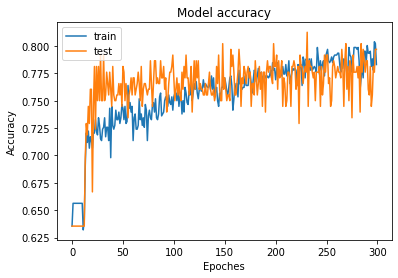

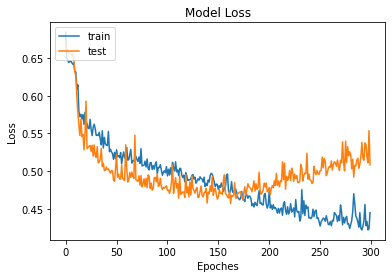

INFO:tensorflow:Assets written to: pima_indian.model\assets
AUC: 0.858


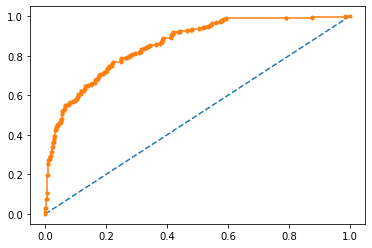

In [4]:

print('val_accuracy =  %.3f' % history.history['val_accuracy'][-1])

# 绘制精度图
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoches')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

# 绘制损失图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

# 保存模型
model.save('pima_indian.model')

# 绘制ROC曲线
probs = model.predict(X)
auc = roc_auc_score(Y, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(Y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.savefig('roc.png')
plt.show()
